# Sprint 10 - Proyecto

Eres analista en una gran tienda online. Junto con el departamento de marketing has recopilado una lista de hipótesis que pueden ayudar a aumentar los ingresos.

Tienes que priorizar estas hipótesis, lanzar un test A/B y analizar los resultados.

#### Importar Librerías

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
import math as mt
import matplotlib.pyplot as plt
import datetime as dt

#### Importamos Datasets

In [2]:
hypotheses = pd.read_csv('hypotheses_us.csv', sep = ';')
orders = pd.read_csv('orders_us.csv', sep = ',')
visits = pd.read_csv('visits_us.csv', sep = ',')

#### Revisamos la información de cada dataset para tener conocimiento de los datos con los que estamos trabajando

In [3]:
hypotheses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 492.0+ bytes


In [4]:
hypotheses.head()

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1


In [5]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [6]:
visits.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


In [8]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [9]:
orders['group'].value_counts()

group
B    640
A    557
Name: count, dtype: int64

In [10]:
visits['group'].value_counts()

group
A    31
B    31
Name: count, dtype: int64

## Priorizar Hipótesis

In [11]:
hypotheses

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


In [12]:
hypotheses['Hypothesis'].unique()

array(['Add two new channels for attracting traffic. This will bring 30% more users',
       'Launch your own delivery service. This will shorten delivery time',
       "Add product recommendation blocks to the store's site. This will increase conversion and average purchase size",
       'Change the category structure. This will increase conversion since users will find the products they want more quickly',
       'Change the background color on the main page. This will increase user engagement',
       'Add a customer review page. This will increase the number of orders',
       'Show banners with current offers and sales on the main page. This will boost conversion',
       'Add a subscription form to all the main pages. This will help you compile a mailing list',
       'Launch a promotion that gives users discounts on their birthdays'],
      dtype=object)

- Aplicar el framework ICE para priorizar hipótesis. Ordenarlas en orden descendente de prioridad.

In [13]:
hypotheses['ICE'] =  (hypotheses['Impact'] * hypotheses['Confidence']) / hypotheses['Effort']
hypotheses[['Hypothesis', 'ICE']].sort_values(by = 'ICE' ,ascending = False)

,Hypothesis,ICE
8,Launch a promotion that gives users discounts ...,16.200000
0,Add two new channels for attracting traffic. T...,13.333333
7,Add a subscription form to all the main pages....,11.200000
6,Show banners with current offers and sales on ...,8.000000
2,Add product recommendation blocks to the store...,7.000000
1,Launch your own delivery service. This will sh...,2.000000
5,Add a customer review page. This will increase...,1.333333
3,Change the category structure. This will incre...,1.125000
4,Change the background color on the main page. ...,1.000000


- Aplicar el framework RICE para priorizar hipótesis. Ordenarlas en orden descendente de prioridad.

In [14]:
hypotheses['RICE'] = (hypotheses['Reach'] * hypotheses['Impact'] * hypotheses['Confidence']) / hypotheses['Effort'] 
hypotheses[['Hypothesis', 'RICE']].sort_values(by = 'RICE', ascending = False)

,Hypothesis,RICE
7,Add a subscription form to all the main pages....,112.0
2,Add product recommendation blocks to the store...,56.0
0,Add two new channels for attracting traffic. T...,40.0
6,Show banners with current offers and sales on ...,40.0
8,Launch a promotion that gives users discounts ...,16.2
3,Change the category structure. This will incre...,9.0
1,Launch your own delivery service. This will sh...,4.0
5,Add a customer review page. This will increase...,4.0
4,Change the background color on the main page. ...,3.0


- Mostrar cómo cambia la priorización de hipótesis cuando utilizas RICE en lugar de ICE. Proporcionar una explicación de los cambios.

Cuando priorizamos las hipotesis del framework RICE la hipotesis #7 sobre 'Agregar una forma de suscripcion a todas las paginas principales, esto para obtener una lista de correos' queda en primer lugar ya que tomamos la cantidad de usuarios que se veran afectados, el alcance es el mayor de nuestras hipotesis y esta pienso el esfuerzo no es tan grande ya que solo queremos que cada vez que los clientes visiten una pagina principal a los clientes les aparezca una ventana emergente para que se suscriban en la pagina y el esfuerzo es medio.

La hipotesis #2 sobre 'Agregar recomendacion de producto para incrementar la conversion y ticket promedio de compra'tambien sube de puesto por el impacto y alcance que tendra, basicamente cualquier producto que te interese arrojara una recomendacion que impactara en tu desicion de compra y el esfuerzo es bajo.

La hipotesis #6 no cambia de lugar, mantiene la cuarta posicion, me parece que demuestra permancer dentro del promedio. tiene un alto nivel de confianza el estar mostrando banners con promociones y ventas

La hipotesis #8 decrece debido al bajo alcance que tiene para los usuarios principalmente.

## Análisis Test A/B

In [15]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visits['date'] = visits['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [16]:
print(orders.head())
print(visits.head())

   transactionId   visitorId       date  revenue group
0     3667963787  3312258926 2019-08-15     30.4     B
1     2804400009  3642806036 2019-08-15     15.2     B
2     2961555356  4069496402 2019-08-15     10.2     A
3     3797467345  1196621759 2019-08-15    155.1     B
4     2282983706  2322279887 2019-08-15     40.5     B
        date group  visits
0 2019-08-01     A     719
1 2019-08-02     A     619
2 2019-08-03     A     507
3 2019-08-04     A     717
4 2019-08-05     A     756


In [17]:
datesGroups = orders[['date', 'group']].drop_duplicates()

In [18]:
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date': 'max', 'group': 'max', 'transactionId': pd.Series.nunique, 'visitorId': pd.Series.nunique ,'revenue': 'sum'}), axis = 1).sort_values(by = ['date', 'group'])

In [19]:
ordersAggregated.head()

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,24,20,2356.8
66,2019-08-01,B,21,20,1620.0
175,2019-08-02,A,44,38,3860.3
173,2019-08-02,B,45,43,4243.8
291,2019-08-03,A,68,62,5675.5


In [20]:
visitorsAggregated = datesGroups.apply(lambda x: visits[np.logical_and(visits['date'] <= x['date'], visits['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visits' : 'sum'}), axis = 1).sort_values(by = ['date', 'group'])

In [21]:
visitorsAggregated.head()

,date,group,visits
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


In [22]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on = ['date', 'group'], right_on = ['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,2356.8,719
1,2019-08-01,B,21,20,1620.0,713
2,2019-08-02,A,44,38,3860.3,1338
3,2019-08-02,B,45,43,4243.8,1294
4,2019-08-03,A,68,62,5675.5,1845


1. Representa gráficamente el ingreso acumulado por grupo. Haz conclusiones y conjeturas.

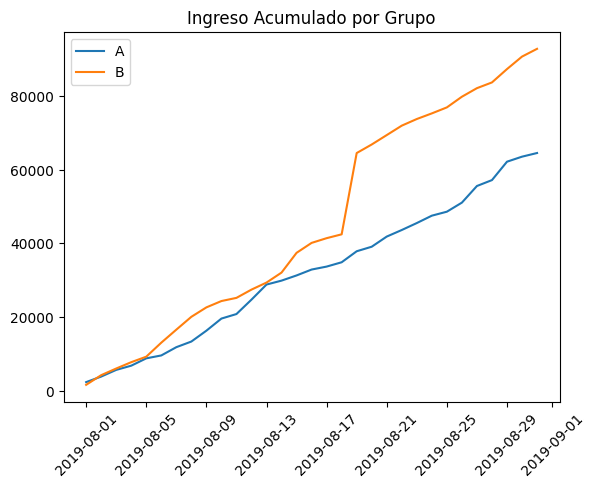

In [23]:
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][['date', 'revenue', 'orders']]

cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][['date', 'revenue', 'orders']]

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label = 'A')

plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label = 'B')

plt.title('Ingreso Acumulado por Grupo')

plt.xticks(rotation = 45)

plt.legend()

Tenemos un crecimiento mayor en los ingresos del grupo B, en 2019-08-17 tenemos un incremento clave de 20,000 que es el punto clave donde el grupo B se muestra superior al grupo A, puede ser debido a que hubo pedidos con alto revenue.
Tambien podemos ver que los ingresos acumulados tanto en A como en B mantienen una tendencia a la alza respecto al tiempo.

2. Representa gráficamente el tamaño de pedido promedio acumulado por grupo. Haz conclusiones y conjeturas.

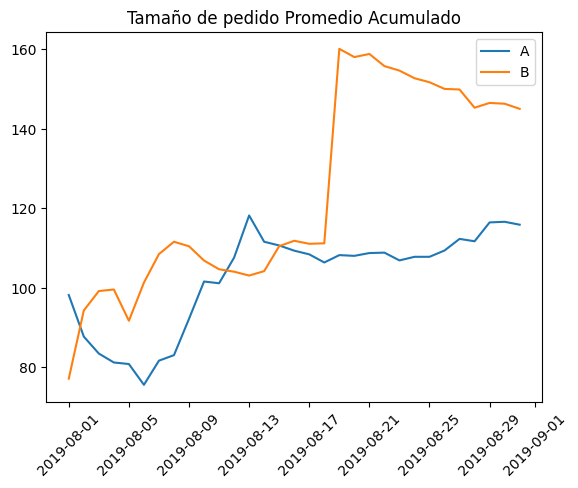

In [24]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'] / cumulativeRevenueA['orders'], label = 'A')

plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'] / cumulativeRevenueB['orders'], label = 'B')

plt.title('Tamaño de pedido Promedio Acumulado')

plt.xticks(rotation = 45)

plt.legend()


Estamos viendo el tamaño promedio de compra, vemos que el tamaño promedio de compra del grupo B es mayor que el grupo A e igualmente podemos notar ese pico en el grupo B cerca de la fecha 2019-08-17.

Ambos tienen decrecimiento en promedio de compra entre 2019-08-04 y 2019-08-05 y comienza a crecer el ticket promedio de compra. Despues el grupo A supera al B en 2019-08-13, decrece el promedio de compra y posteriormente se estabiliza entre 110-120. Pero el grupo B despues de esa caida en 2019-08-13 tiene el pico de crecimiento de promedio de venta y comienza a decrecer progresivamente.

3. Representa gráficamente la diferencia relativa en el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A. Haz conclusiones y conjeturas.

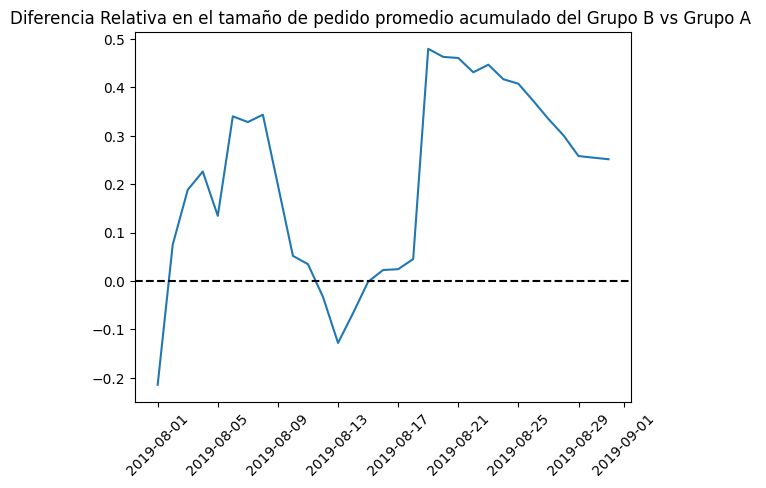

In [25]:
mergeCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on = 'date', right_on = 'date', how = 'left', suffixes = ['A', 'B'])

plt.plot(mergeCumulativeRevenue['date'], (mergeCumulativeRevenue['revenueB'] / mergeCumulativeRevenue['ordersB']) / (mergeCumulativeRevenue['revenueA'] / mergeCumulativeRevenue['ordersA']) -1)

plt.title('Diferencia Relativa en el tamaño de pedido promedio acumulado del Grupo B vs Grupo A ')

plt.xticks(rotation = 45)

plt.axhline(y = 0, color = 'black', linestyle = '--')

En la gráfica podemos notar que el tamaño promedio de compra del grupo B es a menudo mayor que el grupo A, sólo hay 3 pts donde el tamaño promedio es similar pero el grupo B tiene valores más altos y sifgnificativos.
Esto puede ser debido a pedidos con montos grandes que están siendo atípicos en nuestro análisis.

4. Calcula la tasa de conversión de cada grupo como la relación entre los pedidos y el número de visitas de cada día. Representa gráficamente las tasas de conversión diarias de los dos grupos y describe la diferencia. Saca conclusiones y haz conjeturas.

In [26]:
cumulativeData['conversion'] = cumulativeData['orders'] / cumulativeData['visitors']
cumulativeData.head()

,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,24,20,2356.8,719,0.033380
1,2019-08-01,B,21,20,1620.0,713,0.029453
2,2019-08-02,A,44,38,3860.3,1338,0.032885
3,2019-08-02,B,45,43,4243.8,1294,0.034776
4,2019-08-03,A,68,62,5675.5,1845,0.036856


In [27]:
cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A']

cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B']

In [28]:
cumulativeDataA

,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,24,20,2356.8,719,0.033380
2,2019-08-02,A,44,38,3860.3,1338,0.032885
4,2019-08-03,A,68,62,5675.5,1845,0.036856
6,2019-08-04,A,84,77,6822.1,2562,0.032787
8,2019-08-05,A,109,100,8810.2,3318,0.032851
10,2019-08-06,A,127,114,9600.0,3985,0.031870
12,2019-08-07,A,145,131,11842.9,4629,0.031324
14,2019-08-08,A,161,146,13373.3,5239,0.030731
16,2019-08-09,A,177,159,16320.4,5856,0.030225
18,2019-08-10,A,193,175,19608.6,6262,0.030821


In [29]:
cumulativeDataB

,date,group,orders,buyers,revenue,visitors,conversion
1,2019-08-01,B,21,20,1620.0,713,0.029453
3,2019-08-02,B,45,43,4243.8,1294,0.034776
5,2019-08-03,B,61,59,6050.6,1803,0.033833
7,2019-08-04,B,78,75,7767.9,2573,0.030315
9,2019-08-05,B,101,98,9262.9,3280,0.030793
11,2019-08-06,B,129,123,13069.3,3935,0.032783
13,2019-08-07,B,153,146,16600.8,4644,0.032946
15,2019-08-08,B,180,171,20088.6,5298,0.033975
17,2019-08-09,B,205,193,22646.7,5908,0.034699
19,2019-08-10,B,228,215,24367.1,6277,0.036323


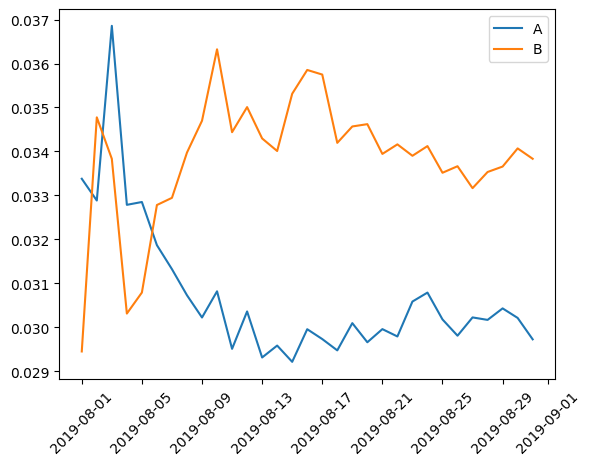

In [30]:
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label = 'A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label = 'B')

plt.xticks(rotation = 45)

plt.legend()

En un inicio la tasa de conversión del grupo A es superior al grupo B, sin embargo, aproximadamente el 2019-08-03 el grupo A comienza a descender en su tasa de conversión de manera abrupta hasta que se estabiliza entre el 2.9 y 3.0%.
Y el grupo B después de decrecer en 2018-08-02 comienza a crecer el 2018-08-04 hasta quedar entre valores del 3.3% y 3.6%, demostrando una superioridad en la tasa de conversión.

5. Traza un gráfico de dispersión del número de pedidos por usuario. Haz conclusiones y conjeturas.

In [31]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [32]:
ordersByUsers = orders.groupby('visitorId', as_index = False).agg({'transactionId' : pd.Series.nunique})
ordersByUsers.columns = ['userId', 'orderId']

print(ordersByUsers.sort_values(by = 'orderId', ascending = False).head(10))

          userId  orderId
1023  4256040402       11
591   2458001652       11
569   2378935119        9
487   2038680547        8
44     199603092        5
299   1230306981        5
55     237748145        5
744   3062433592        5
897   3717692402        5
917   3803269165        5


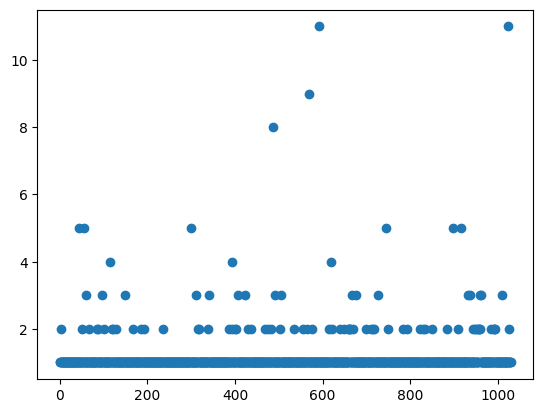

In [33]:
x_values = pd.Series(range(0, len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orderId'])

Podemos observar que tenemos clientes con hasta 11 pedidos, podríamos tomar valores atípicos aquellos usuarios con más de 3 pedidos, ya que la mayoría de los usuarios tienen entre 1 y 2 pedidos.

6. Calcula los percentiles 95 y 99 del número de pedidos por usuario. Define el punto en el cual un punto de datos se convierte en una anomalía.

In [34]:
print(np.percentile(ordersByUsers['orderId'], [95, 99]))

[2. 4.]


No más del 5% de los clientes realizan más de 2 pedidos, estableceremos un límite superior de entre 2 y 3 pedidos para filtrar cualquier tipo de anomalía.

7. Traza un gráfico de dispersión de los precios de los pedidos. Haz conclusiones y conjeturas

<Axes: >

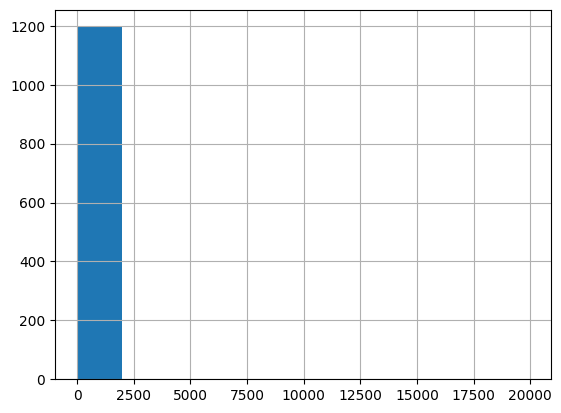

In [35]:
orders['revenue'].hist()

La mayoría de los pedidos no superan un monto de 2500, trazaré un gráfico de dispersión para revisar si tenemos valores atípicos y revisaré el valor máximo para tener el histórico.

In [36]:
orders['revenue'].max()

np.float64(19920.4)

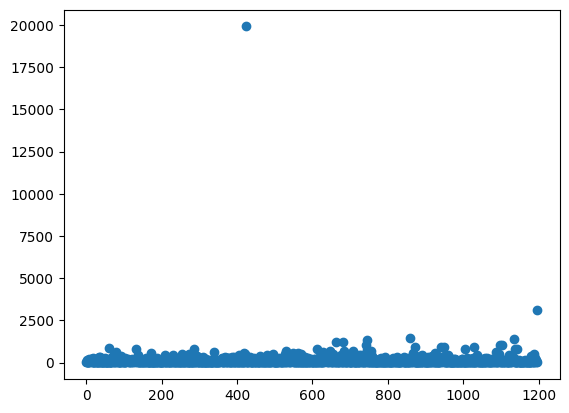

In [37]:
x_values = pd.Series(range(0, len(orders['revenue'])))

plt.scatter(x_values, orders['revenue'])

Tenemos 1 valor atípico bastante alto, con un valor de más de 19000, y otro más con un valor por encima de los 2500 pero no es tan extremo como el primero. Tendremos que remover este valor atípico.

8. Calcula los percentiles 95 y 99 de los precios de los pedidos. Define el punto en el cual un punto de datos se convierte en una anomalía.

In [38]:
print(np.percentile(orders['revenue'], [95, 99]))

[435.54  900.904]


Tenemos que no más del 5% superan un monto de 435.50 y sólo el 1% supera los 901, defineremos un punto anómalo de 400.

9. Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos en bruto. Haz conclusiones y conjeturas.

In [39]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [40]:
visits.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [41]:
ordersByUsersA = orders[orders['group'] == 'A'].groupby('visitorId', as_index = False).agg({'transactionId': pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = orders[orders['group'] == 'B'].groupby('visitorId', as_index = False).agg({'transactionId': pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']

In [42]:
sampleA = pd.concat([ordersByUsersA['orders'], pd.Series(0, index = np.arange(visits[visits['group'] == 'A']['visits'].sum() - len(ordersByUsersA['orders'])), name = 'orders')], axis = 0)

sampleB = pd.concat([ordersByUsersB['orders'], pd.Series(0, index = np.arange(visits[visits['group'] == 'B']['visits'].sum() - len(ordersByUsersB['orders'])), name = 'orders')], axis = 0)

In [43]:
print('{0:.3f}'.format(st.mannwhitneyu(sampleA, sampleB)[1]))
print('{0:.3f}'.format(sampleB.mean() / sampleA.mean() - 1))

0.017
0.138


El valor p es menor al valor de significancia de 0.05, por lo que las tasas de conversión de los grupos tienen diferencias estadísticas significativas.

La ganacia de conversión relativa del grupo B en comparación del grupo A es del 13.8%.

10. Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos en bruto. Haz conclusiones y conjeturas.

In [44]:
print('{0:.3f}'.format(st.mannwhitneyu(orders[orders['group'] == 'A']['revenue'], orders[orders['group'] == 'B']['revenue'])[1]))

print('{0:.3f}'.format(orders[orders['group'] == 'B']['revenue'].mean() / orders[orders['group'] == 'A']['revenue'].mean() - 1))

0.692
0.252


El valor p es mayor que el 0.05 de significancia, por lo que estadísitcamente no existen diferencias significativas entre los tamaños de pedido promedio de los grupos.

Sin embargo, la diferencia relativa es del 25%, es importante trabajar y descartar las anomalías

- Vamos a definir los usuarios anómalos como aquellos que realizan más de dos pedidos o un pedido mayor a $435.

In [45]:
userWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'], ordersByUsersB[ordersByUsersB['orders'] > 2]['userId']], axis = 0)
userWithExpenseOrders = orders[orders['revenue'] > 435]['visitorId']
abnormalUsers = pd.concat([userWithManyOrders, userWithExpenseOrders], axis = 0).drop_duplicates().sort_values()

print(abnormalUsers.head())
print(abnormalUsers.shape)

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
dtype: int64
(75,)


Tenemos 75 usuarios anómalos con base a los límites que establecimos.

11. Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas.

In [46]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'], pd.Series(0, index = np.arange(visits[visits['group'] == 'A']['visits'].sum() - len(ordersByUsersA['orders'])), name = 'orders')], axis = 0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'], pd.Series(0, index = np.arange(visits[visits['group'] == 'B']['visits'].sum() - len(ordersByUsersB['orders'])), name = 'orders')], axis = 0)

In [47]:
print('{0:.3f}'.format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))

print('{0:.3f}'.format(sampleBFiltered.mean() / sampleAFiltered.mean() - 1))

0.014
0.171


El valor p no cambio mucho, de 0.017 a 0.014, la hipótesis nula sobre que la tasa de conversión es estadísticamente igual se rechaza, los grupos tienen diferencias significativas.

12. Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas.

In [48]:
print('{0:.3f}'.format(st.mannwhitneyu(
    orders[np.logical_and(
        orders['group'] == 'A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group'] == 'B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue']
)[1]))


print('{0:.3f}'.format(
    orders[np.logical_and(orders['group'] == 'B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() /
    orders[np.logical_and(orders['group'] == 'A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() -1))

0.750
-0.027


El valor p aumentó de 69% a 75% y la diferencia relativa de 25% a 27%.

13. Toma una decisión basada en los resultados de la prueba. Las decisiones posibles son: 1. Parar la prueba, considerar a uno de los grupos como líder. 2. Parar la prueba, concluir que no hay diferencia entre los grupos. 3. Continuar la prueba.

1. La diferencia en la tasa de conversión entre los datos brutos y filtrados es mínima, y en ambos tenemos que hay diferencias estadísticas significativas entre ambos grupos.
2. Las pruebas realizadas para determinar el tamaño promedio de pedido entre los grupos arrojo que tanto en los datos brutos como filtrados tenemos que no hay diferencias significativas.
3. La decisión que tomo con base a los resultados es parar la prueba y declarar al grupo B como líder, ya que la tasa de conversión es mayor, y tenemos que el tamaño promedio de pedidos de ambos grupos es estadisticamente igual.